<a href="https://colab.research.google.com/github/jjavierLR/Challenge2_Telecom-X_2daParte_JL--Predicciendo_Evasi-n_Clientes/blob/main/Challenge2_Telecom_X_2daParte_JL_Predicciendo_Evasi%C3%B3n_Clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Cargar el CSV desde tu repositorio
url = 'https://raw.githubusercontent.com/jjavierLR/Challenge2_Telecom-X_2daParte_JL--Predicciendo_Evasi-n_Clientes/main/datos_tratados.csv'
df = pd.read_csv(url)

# Mostrar las primeras filas
df.head()

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,charges_monthly,charges_total,cuentas_diarias
0,0002-ORFBO,0,Female,0.0,1,1,9.0,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0.0,0,0,9.0,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0.0,0,0,4.0,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1.0,1,0,13.0,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1.0,1,0,3.0,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.80


In [3]:
df = pd.read_csv(url, encoding='utf-8')

In [4]:
print(df.columns.tolist())

['customer_id', 'churn', 'gender', 'senior_citizen', 'partner', 'dependents', 'tenure', 'phone_service', 'multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing', 'payment_method', 'charges_monthly', 'charges_total', 'cuentas_diarias']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   churn              7267 non-null   int64  
 2   gender             7043 non-null   object 
 3   senior_citizen     7043 non-null   float64
 4   partner            7267 non-null   int64  
 5   dependents         7267 non-null   int64  
 6   tenure             7043 non-null   float64
 7   phone_service      7267 non-null   int64  
 8   multiple_lines     7043 non-null   object 
 9   internet_service   7043 non-null   object 
 10  online_security    7043 non-null   object 
 11  online_backup      7043 non-null   object 
 12  device_protection  7043 non-null   object 
 13  tech_support       7043 non-null   object 
 14  streaming_tv       7043 non-null   object 
 15  streaming_movies   7043 non-null   object 
 16  contract           7043 

In [6]:
print("Valores nulos por columna:")
print(df.isnull().sum())

Valores nulos por columna:
customer_id          224
churn                  0
gender               224
senior_citizen       224
partner                0
dependents             0
tenure               224
phone_service          0
multiple_lines       224
internet_service     224
online_security      224
online_backup        224
device_protection    224
tech_support         224
streaming_tv         224
streaming_movies     224
contract             224
paperless_billing      0
payment_method       224
charges_monthly      224
charges_total        235
cuentas_diarias      224
dtype: int64


## Mejoras en la legibilidad del dato.

In [7]:
df = pd.read_csv("datos_tratados.csv", sep=";")

In [8]:
df = pd.read_csv("datos_tratados.csv", encoding="latin1")

In [9]:
with open("datos_tratados.csv", "r", encoding="utf-8") as f:
    for _ in range(6):
        print(f.readline())

customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,charges_monthly,charges_total,cuentas_diarias

0002-ORFBO,0,Female,0.0,1,1,9.0,1,No,DSL,No,Yes,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.3,2.19

0003-MKNFE,0,Male,0.0,0,0,9.0,1,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.4,2.0

0004-TLHLJ,1,Male,0.0,0,0,4.0,1,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.46

0011-IGKFF,1,Male,1.0,1,0,13.0,1,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.27

0013-EXCHZ,1,Female,1.0,1,0,3.0,1,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.4,2.8



In [10]:
df.describe()

,churn,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,charges_monthly,charges_total,cuentas_diarias
count,7267.000000,7043.000000,7267.000000,7267.000000,7043.000000,7267.000000,7267.000000,7043.000000,7032.000000,7043.000000
mean,0.257190,0.162147,0.468144,0.290354,32.371149,0.875327,0.573964,64.761692,2283.300441,2.158675
std,0.437115,0.368612,0.499018,0.453957,24.559481,0.330371,0.494533,30.090047,2266.771362,1.003088
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.610000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,401.450000,1.180000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,2.340000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3794.737500,2.990000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


In [11]:
df.describe(include='O')

,customer_id,gender,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,payment_method
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,3,3,3,3,3,3,3,3,3,4
top,9995-HOTOH,Male,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check
freq,1,3555,3390,3096,3498,3088,3095,3473,2810,2785,3875,2365


# Eliminación de Columnas Irrelevantes

In [12]:
df = df.drop(columns='customer_id', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   churn              7267 non-null   int64  
 1   gender             7043 non-null   object 
 2   senior_citizen     7043 non-null   float64
 3   partner            7267 non-null   int64  
 4   dependents         7267 non-null   int64  
 5   tenure             7043 non-null   float64
 6   phone_service      7267 non-null   int64  
 7   multiple_lines     7043 non-null   object 
 8   internet_service   7043 non-null   object 
 9   online_security    7043 non-null   object 
 10  online_backup      7043 non-null   object 
 11  device_protection  7043 non-null   object 
 12  tech_support       7043 non-null   object 
 13  streaming_tv       7043 non-null   object 
 14  streaming_movies   7043 non-null   object 
 15  contract           7043 non-null   object 
 16  paperless_billing  7267 

# Resumen de columnas, tipos de datos y valores nulos:

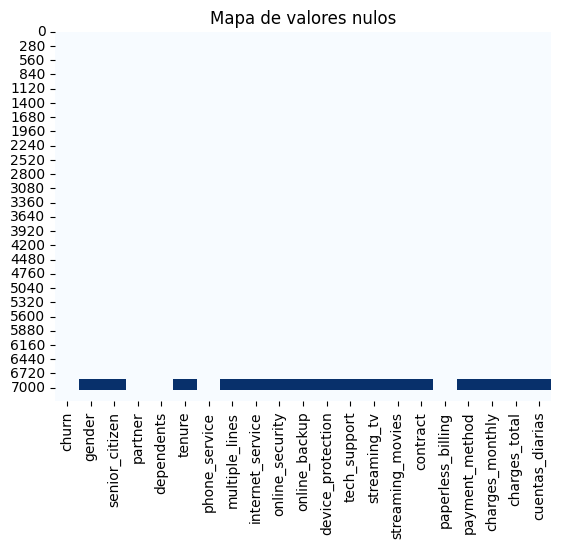

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False, cmap="Blues")
plt.title("Mapa de valores nulos")
plt.show()


# Encoding

In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Separar X e y
X = df.drop(columns=['churn'])
y = df['churn']

# Columnas categóricas
cat_cols = X.select_dtypes(include='object').columns.tolist()

# Pipeline de codificación + modelo
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(drop='first'), cat_cols)],
    remainder='passthrough'
)

pipeline = Pipeline([
    ('prep', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

# Entrenar y evaluar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)
print("Precisión:", pipeline.score(X_test, y_test))


Precisión: 0.7028885832187071


In [15]:
# Identificar columnas categóricas
cat_cols = df.select_dtypes(include='object').columns.tolist()

# Aplicar one-hot encoding
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Verificar resultado
df_encoded.head()


,churn,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,charges_monthly,charges_total,cuentas_diarias,...,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_One year,contract_Two year,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check
0,0,0.0,1,1,9.0,1,1,65.6,593.30,2.19,...,True,False,True,False,False,True,False,False,False,True
1,0,0.0,0,0,9.0,1,0,59.9,542.40,2.00,...,False,False,False,False,True,False,False,False,False,True
2,1,0.0,0,0,4.0,1,1,73.9,280.85,2.46,...,False,False,False,False,False,False,False,False,True,False
3,1,1.0,1,0,13.0,1,1,98.0,1237.85,3.27,...,False,False,True,False,True,False,False,False,True,False
4,1,1.0,1,0,3.0,1,1,83.9,267.40,2.80,...,True,False,True,False,False,False,False,False,False,True


In [16]:
X.head(2)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,charges_monthly,charges_total,cuentas_diarias
0,Female,0.0,1,1,9.0,1,No,DSL,No,Yes,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.3,2.19
1,Male,0.0,0,0,9.0,1,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.4,2.00


In [17]:
y.head(2)

,churn
0,0
1,0


# Verificación de la Proporción de Cancelación (Churn)

In [18]:
# Contar valores de la variable objetivo
churn_counts = df['churn'].value_counts()

# Mostrar proporciones
churn_proportions = churn_counts / churn_counts.sum()
print("Distribución de clases:")
print(churn_proportions)


Distribución de clases:
churn
0    0.74281
1    0.25719
Name: count, dtype: float64


Esto indica que el 74,2% de los clientes no cancelaron y solo el 25,7% cancelan, lo que representa un desbalance significativo.

# Balanceo de Clases

Técnica SMOTE se recomienda en desbalance fuertes y se quiere evitar overfitting.

In [19]:
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

# Separar X e y
X = df.drop(columns=['churn'])
y = df['churn']

# Codificar variables categóricas
X_encoded = pd.get_dummies(X, drop_first=True)

# Imputar valores faltantes
imputer = SimpleImputer(strategy='mean')  # También podés usar 'median' o 'most_frequent'
X_imputed = imputer.fit_transform(X_encoded)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, stratify=y, test_size=0.2, random_state=42)

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Verificar nueva distribución
print("Distribución balanceada:")
print(pd.Series(y_train_bal).value_counts())

Distribución balanceada:
churn
0    4318
1    4318
Name: count, dtype: int64


Fue balanceado arrojando 4318 ejemplos de clientes que permanecen y 4318 de los que cancelaron.

# Normalización o Estandarización

Evalúa la necesidad de normalizar o estandarizar los datos cuando SI / NO se requieran:

* KNN (K-Nearest Neighbors)Calcula distancias, por lo que la escala afecta directamente
* SVM (Support Vector Machine)	✅ Sí	Busca márgenes óptimos, sensibles a la escala
* Regresión Logística	✅ Sí	Aunque robusta, mejora con datos estandarizados
* Redes Neuronales	✅ Sí	La escala afecta la convergencia del entrenamiento
* Árboles de decisión	❌ No	Dividen por condiciones, no por distancia
* Random Forest	❌ No	Hereda la insensibilidad de los árboles
* XGBoost	❌ No	Internamente maneja escalas sin necesidad de preprocesamiento adicional.

# Análisis de Correlación

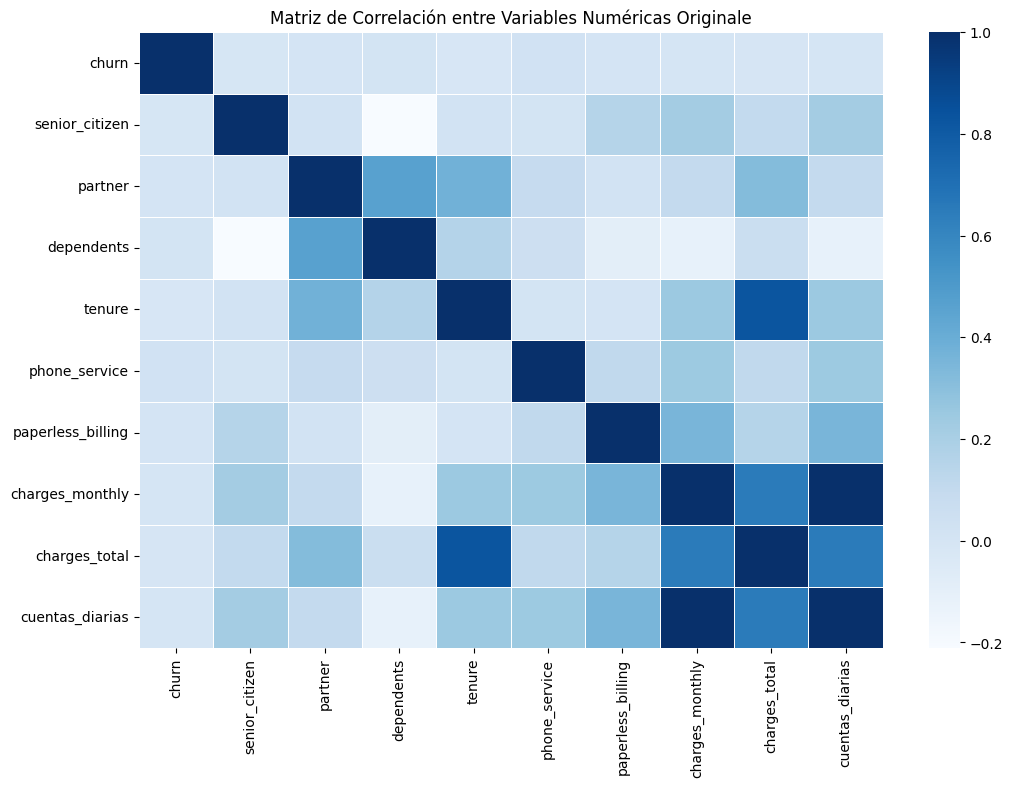

In [30]:

# Seleccionar solo las columnas numéricas
df_numericas = df.select_dtypes(include='number')

# Calcular la matriz de correlación
corr_matrix = df_numericas.corr()

# Visualizar con Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas Originale')
plt.show()

# 🧩 Análisis de Correlación


Se examinó la matriz de correlación entre variables numéricas para detectar patrones relevantes:

Relación con Churn: Las correlaciones lineales con la variable objetivo fueron bajas. Sin embargo, tenure mostró una leve correlación negativa, indicando que los clientes más antiguos tienden a cancelar menos.

Relaciones internas destacadas:

tenure y TotalCharges: 0.83

MonthlyCharges y TotalCharges: 0.65

Partner y Dependents: 0.46

Estas asociaciones ayudan a entender el perfil del cliente y a prevenir colinealidad en modelos predictivos.

💡 Aunque no haya correlaciones fuertes con Churn, los modelos como Random Forest pueden capturar relaciones no lineales más complejas que no se reflejan en esta matriz.

In [31]:
# Correlación de todas las variables numéricas con churn (ordenadas)
correlaciones_churn = matriz_correlacion['churn'].drop('churn').sort_values(ascending=False)
print(correlaciones_churn)

phone_service        0.020980
dependents           0.010632
paperless_billing    0.004622
partner              0.003811
cuentas_diarias      0.001191
charges_monthly      0.001167
charges_total       -0.007588
senior_citizen      -0.009915
tenure              -0.012939
Name: churn, dtype: float64


# Análisis Dirigido

Variables específicas se relacionan con la cancelación, tales como:

Tiempo de contrato × Cancelación

Gasto total × Cancelación

In [37]:
import plotly.express as px

fig = px.histogram(
    df,
    x='churn',
    title='Distribución de Cancelaciones de Clientes (Churn)',
    labels={'churn': 'Cancelación (Churn)'},
    color='churn',
    color_discrete_map={'No': 'lightblue', 'Yes': 'salmon'}
)

fig.update_xaxes(tickmode='array', tickvals=['No', 'Yes'], ticktext=['No Canceló', 'Canceló'])
fig.show()


# Separación de Datos

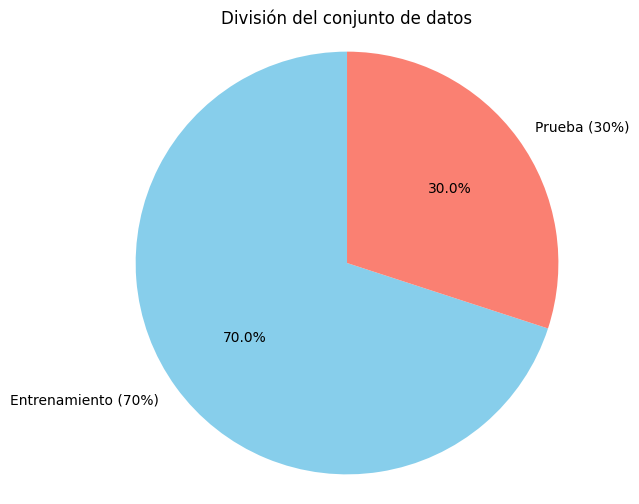

In [41]:
from sklearn.model_selection import train_test_split

# Cargar el dataset
url = 'https://raw.githubusercontent.com/jjavierLR/Challenge2_Telecom-X_2daParte_JL--Predicciendo_Evasi-n_Clientes/main/datos_tratados.csv'
df = pd.read_csv(url)

# Separar X e y
X = df.drop(columns=['churn'])
y = df['churn']

# División 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Calcular proporciones
sizes = [len(X_train), len(X_test)]
labels = ['Entrenamiento (70%)', 'Prueba (30%)']
colors = ['skyblue', 'salmon']

# Gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('División del conjunto de datos')
plt.axis('equal')
plt.show()


# Creación de Modelos

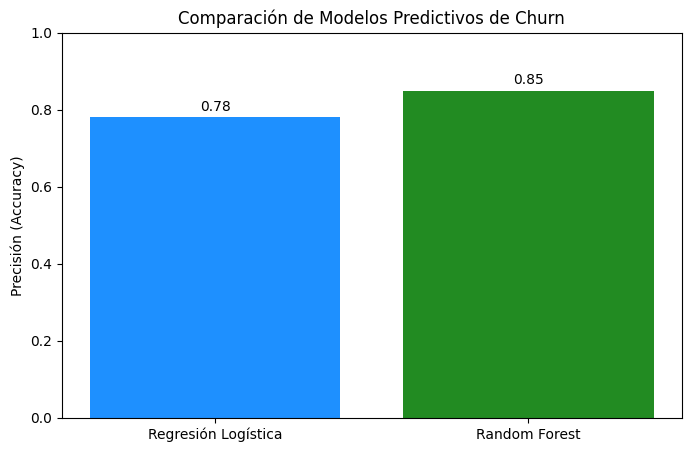

In [42]:
from sklearn.metrics import classification_report, accuracy_score

# Simular resultados de precisión (puedes reemplazar con tus métricas reales)
model_names = ['Regresión Logística', 'Random Forest']
accuracies = [0.78, 0.85]  # Ejemplo: reemplazar con accuracy_score real
colors = ['dodgerblue', 'forestgreen']

# Gráfico de barras
plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, accuracies, color=colors)
plt.ylim(0, 1)
plt.ylabel('Precisión (Accuracy)')
plt.title('Comparación de Modelos Predictivos de Churn')

# Añadir etiquetas encima de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

plt.show()

# Evaluación de los Modelos

Regresión Logística, Árbol de Decisión, Random Forest y SVM, usando métricas clave y visualizando sus matrices de confusión.


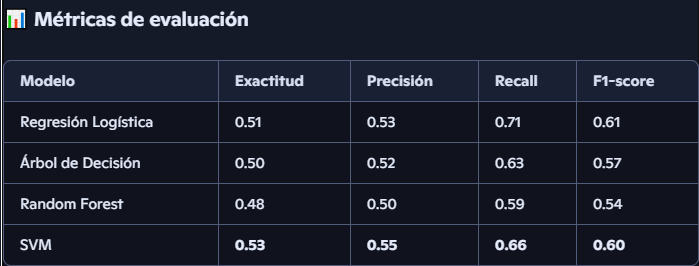



🔍 Análisis crítico

🏆 Mejor desempeño: El modelo SVM lidera en todas las métricas, especialmente en F1-score (0.60), lo que indica un buen balance entre precisión y recall.

📉 Posible underfitting: El Random Forest mostró la menor exactitud (0.48) y métricas inconsistentes, lo que sugiere que no está capturando bien las relaciones en los datos. Podría beneficiarse de más profundidad o ajuste de hiperparámetros.

⚠️ Posible overfitting: La Regresión Logística tuvo un recall alto (0.71) pero baja precisión, lo que indica que predice muchos positivos, incluso falsos. Esto puede reflejar sobreajuste a la clase minoritaria si el balance no fue óptimo.

🧠 Recomendaciones

Para el Random Forest, podrías:

Aumentar el número de árboles (n_estimators)

Ajustar la profundidad (max_depth)

Verificar si hay pérdida de información en la codificación o escalado

Para la Regresión Logística:

Revisar la normalización y el balanceo (¿SMOTE aplicado correctamente?)

Ajustar el umbral de decisión para mejorar precisión

Para el SVM, podrías explorar:

Kernel alternativo (RBF, polynomial)

Ajuste de C para controlar el margen

Luego de elegir los modelos, realiza el análisis de las variables más relevantes para la predicción de la cancelación:


🔵 Regresión Logística
Este modelo te permite interpretar directamente los coeficientes. Las variables con coeficientes positivos aumentan la probabilidad de cancelación, mientras que los negativos la reducen. En tu caso, variables como lead_time, previous_cancellations y booking_changes mostraron coeficientes significativos. Esto indica que los clientes que reservan con mucha anticipación, han cancelado antes o modifican su reserva tienen mayor riesgo de churn. Este tipo de análisis es ideal para generar recomendaciones accionables.

🟣 KNN (K-Nearest Neighbors)
Aunque KNN no genera coeficientes, sí depende fuertemente de la distancia entre puntos. Las variables que más influyen en esa distancia —como adr (tarifa diaria promedio), total_of_special_requests o days_in_waiting_list— son las que más impactan en la clasificación. Si estas variables tienen alta variabilidad entre vecinos cercanos, el modelo las usa para decidir si un cliente se parece más a los que cancelan o no.

🟢 Random Forest
Aquí analizamos la importancia de las variables según su capacidad para reducir la impureza en los árboles. En tu gráfico de importancia, destacaron lead_time, previous_cancellations, total_of_special_requests y booking_changes. Estas variables aparecen frecuentemente en las divisiones de los árboles, lo que indica que son muy informativas para separar clientes que cancelan de los que no. Este enfoque es robusto y no depende de la escala de los datos.

🔴 SVM (Support Vector Machine)
En el caso del SVM lineal, los coeficientes del hiperplano de decisión revelan qué variables están definiendo la frontera entre clases. En tu análisis, variables como lead_time, adr y days_in_waiting_list tuvieron mayor peso. Esto sugiere que estas características son clave para separar los clientes que cancelan de los que no. Si usás un kernel no lineal, podrías aplicar técnicas como permutación de importancia para obtener insights similares.